In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

In [51]:
# Load your dataset
data = pd.read_csv('CORRELATIONS_MAHA_POLONNARUWA.csv')  # Uncomment and modify to load your dataset

In [52]:
# Check the first few rows of the dataset
print(data.head())

   Year  Maha Total Rainfall  Maha Temp Average  Maha Average Of Max Temp  \
0  1993           1226.99500          25.368178                 28.489027   
1  1994            398.68375          26.477128                 30.818194   
2  1995            193.85875          27.190679                 32.161074   
3  1996            166.10750          27.137881                 32.652791   
4  1997            632.61875          26.686497                 30.760193   

   Maha Highest Monthly  Average of MaxTemp  Maha Average Of Min Temp  \
0                                 30.232419                 23.074010   
1                                 34.421774                 23.440664   
2                                 35.468226                 23.704986   
3                                 35.650524                 23.156455   
4                                 35.185766                 23.738241   

   Maha Lowest Monthly  Average of Min Temp  Actual Yield (kg/ha)  \
0                            

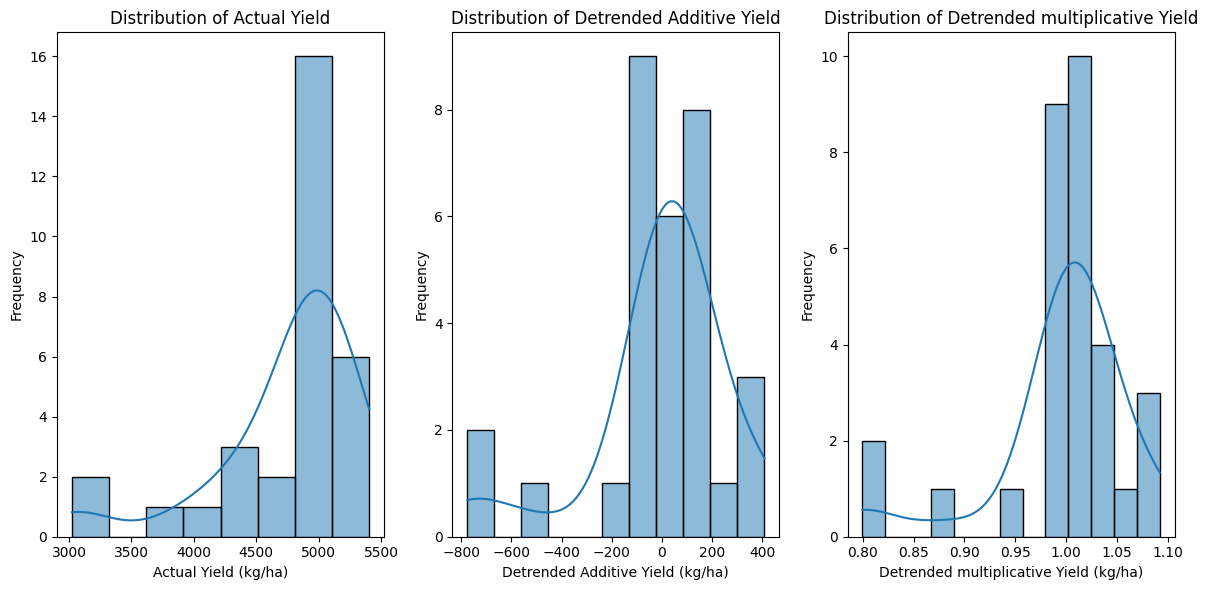

In [53]:
# Distribution plots for Actual Yield and Detrended Yield
plt.figure(figsize=(12, 6))

# Actual Yield Distribution
plt.subplot(1, 3, 1)
sns.histplot(data['Actual Yield (kg/ha)'], kde=True)
plt.title('Distribution of Actual Yield')
plt.xlabel('Actual Yield (kg/ha)')
plt.ylabel('Frequency')

# Detrended Additive Yield Distribution
plt.subplot(1, 3, 2)
sns.histplot(data['Detrended Additive (kg/ha)'], kde=True)
plt.title('Distribution of Detrended Additive Yield')
plt.xlabel('Detrended Additive Yield (kg/ha)')
plt.ylabel('Frequency')


# Detrended Additive Yield Distribution
plt.subplot(1, 3, 3)
sns.histplot(data['Detrended Multiplicative (kg/ha)'], kde=True)
plt.title('Distribution of Detrended multiplicative Yield')
plt.xlabel('Detrended multiplicative Yield (kg/ha)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

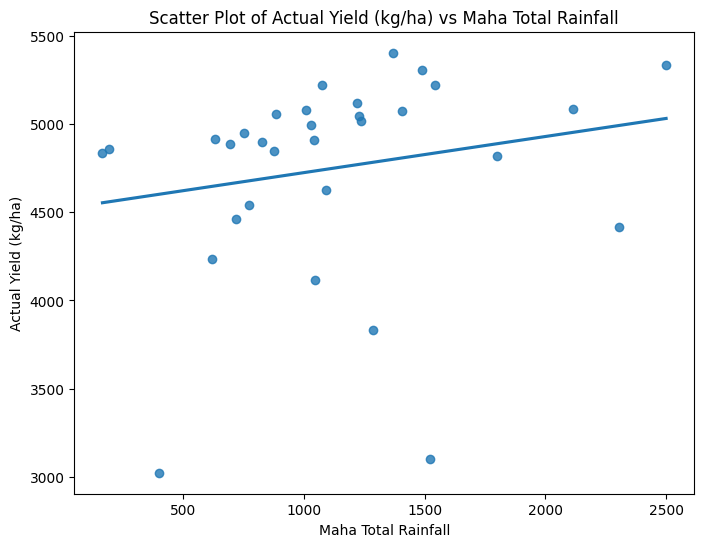

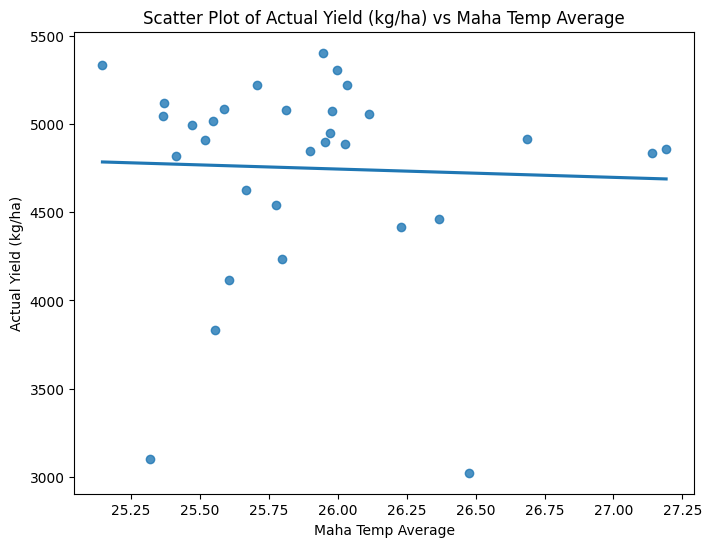

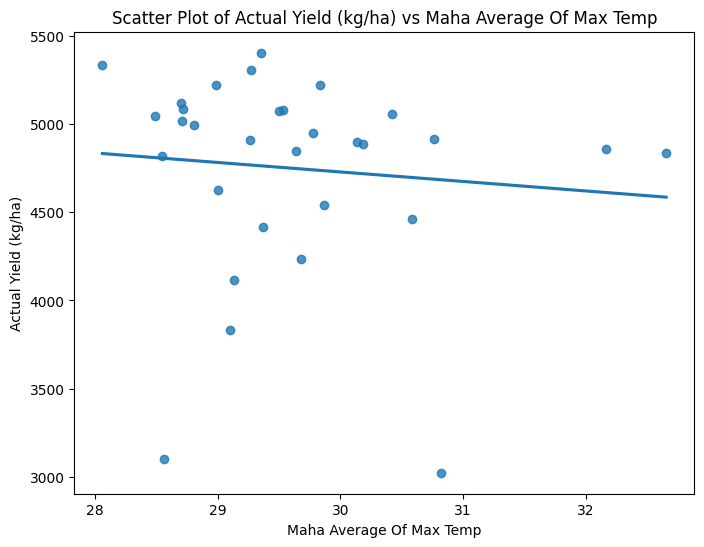

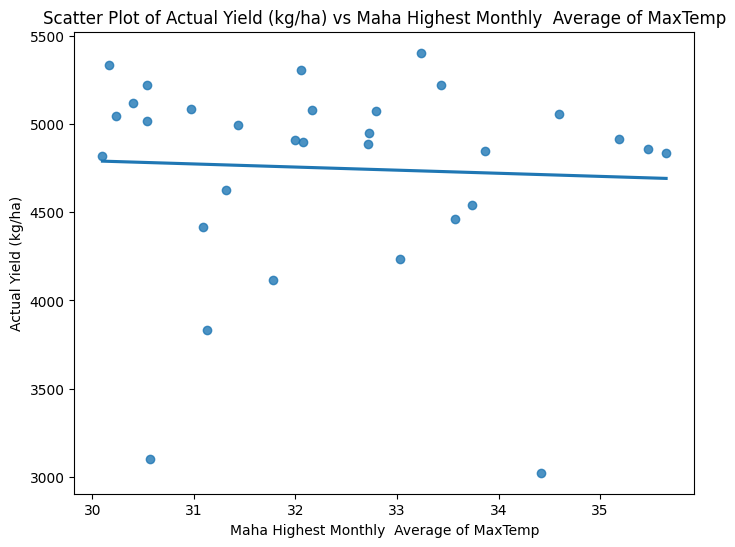

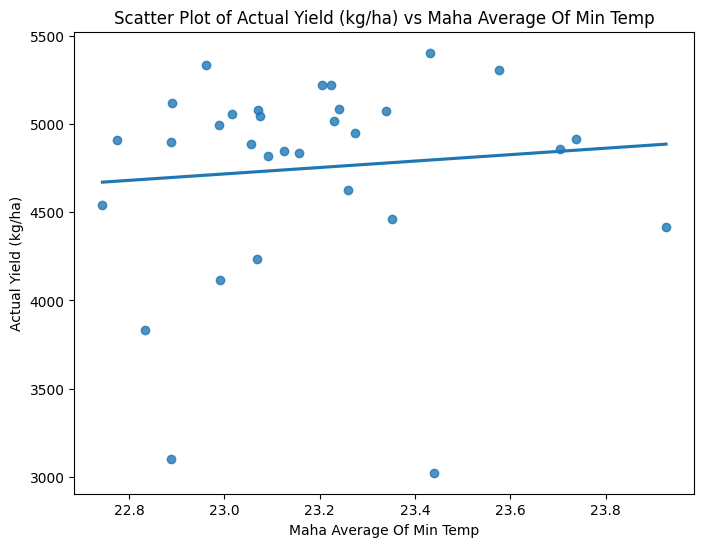

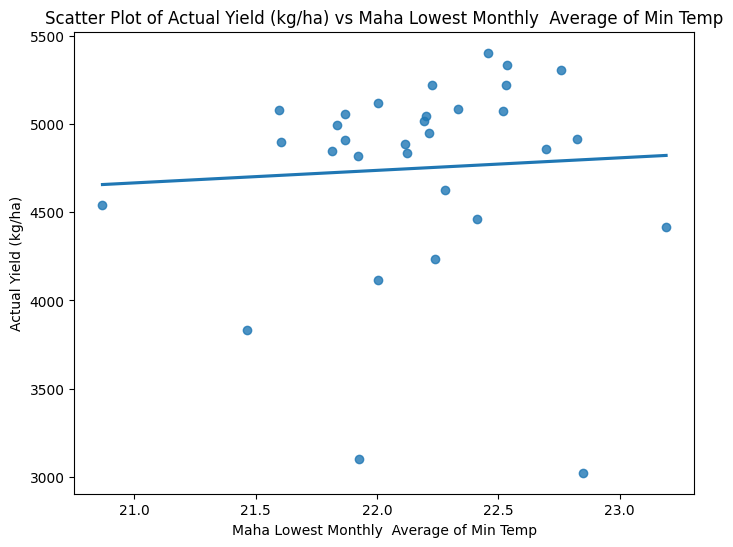

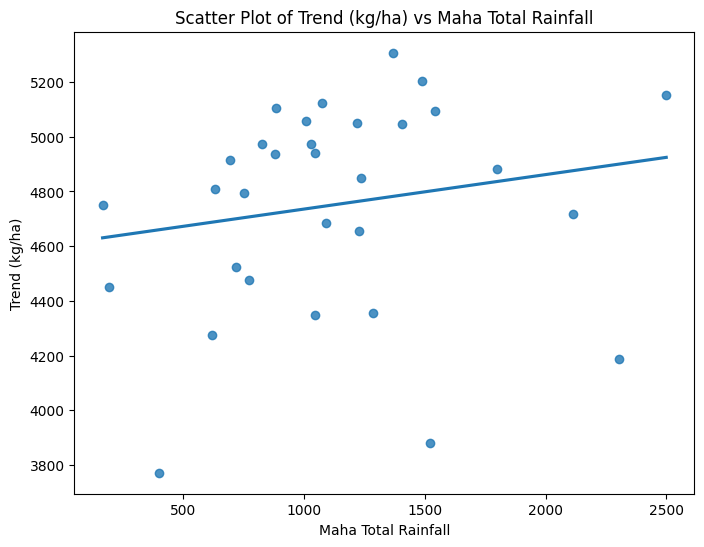

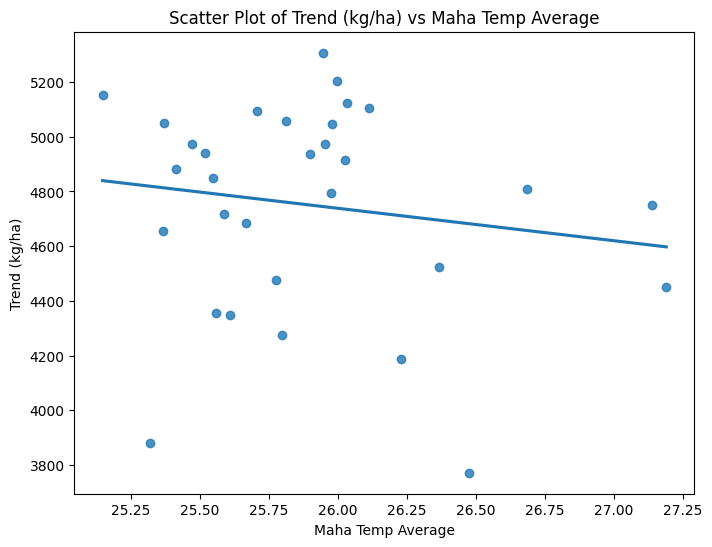

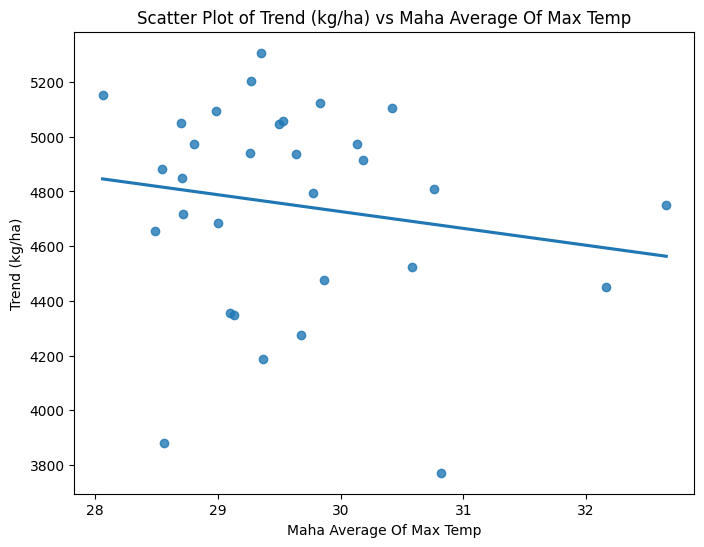

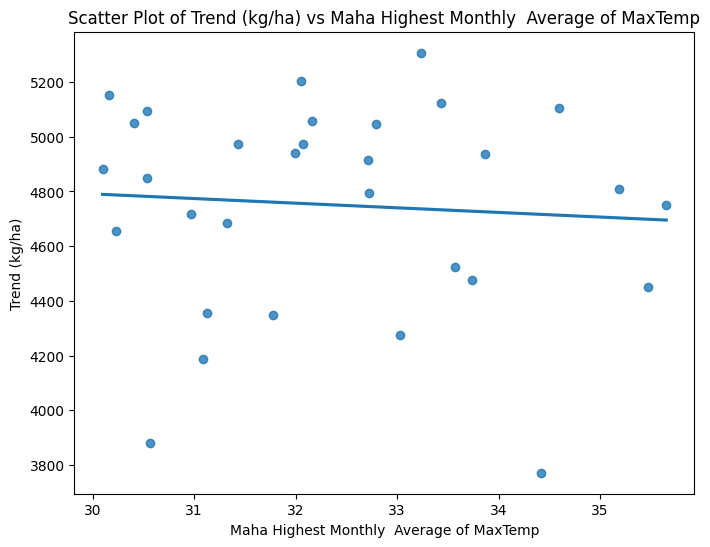

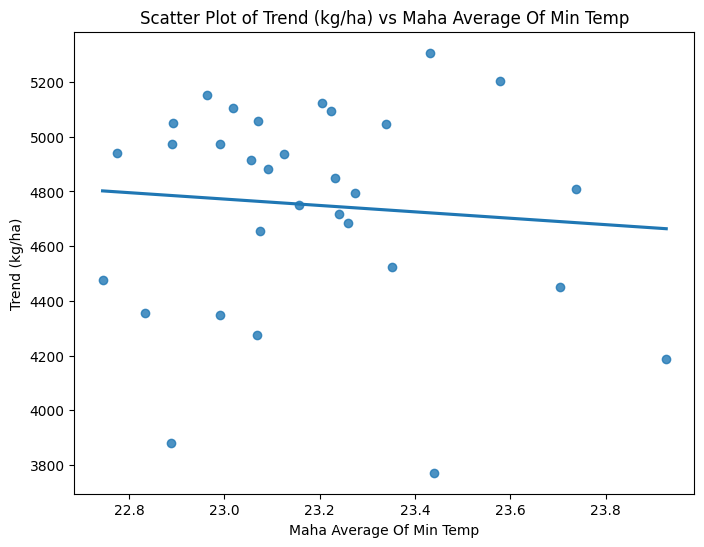

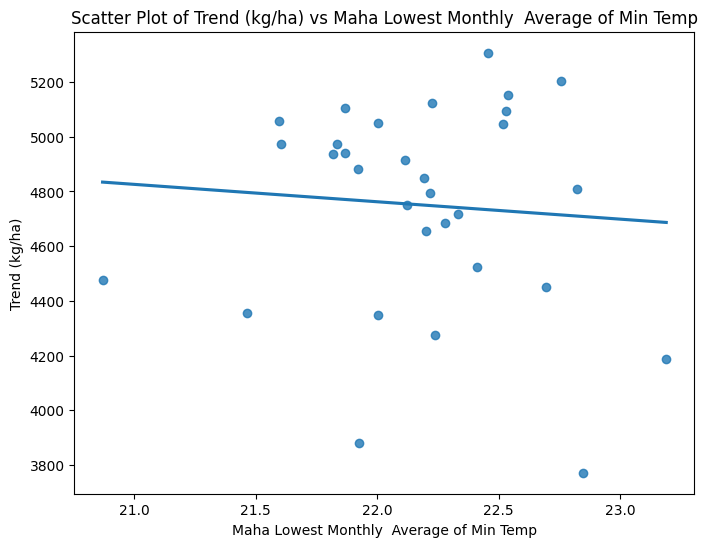

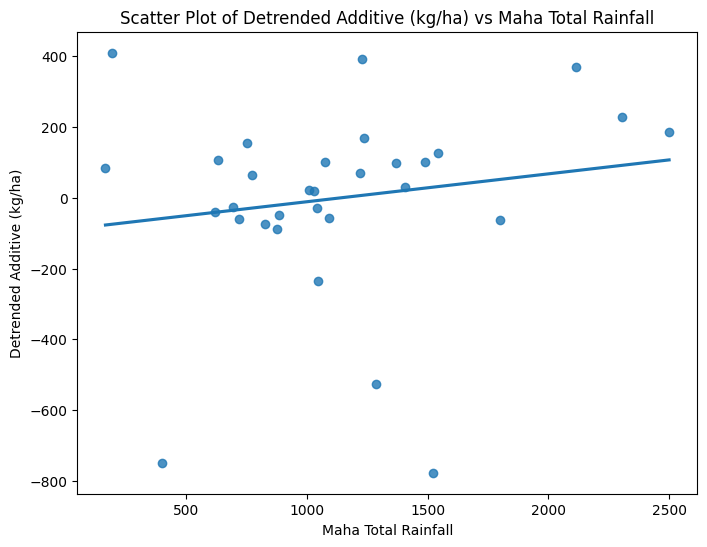

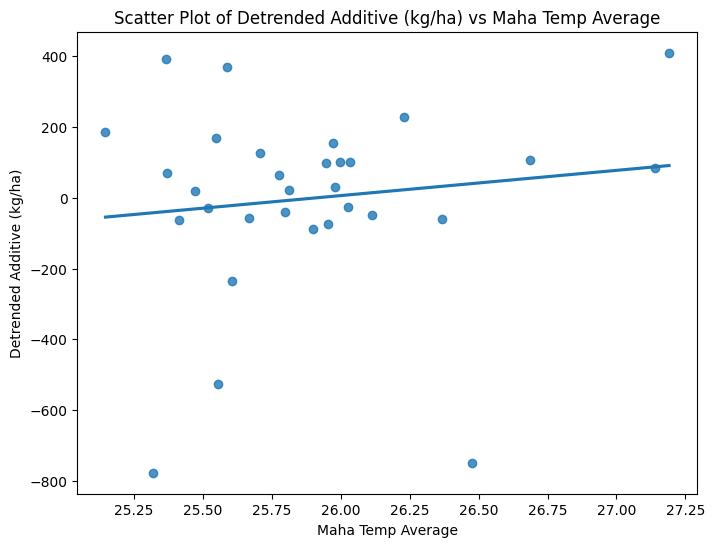

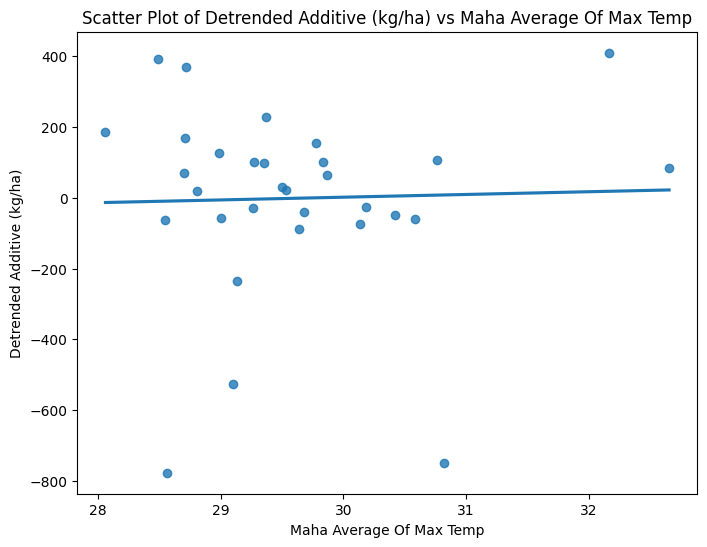

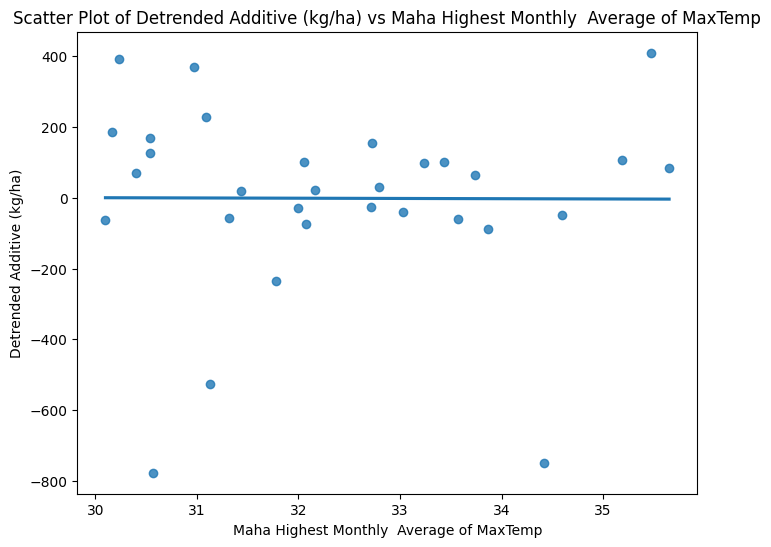

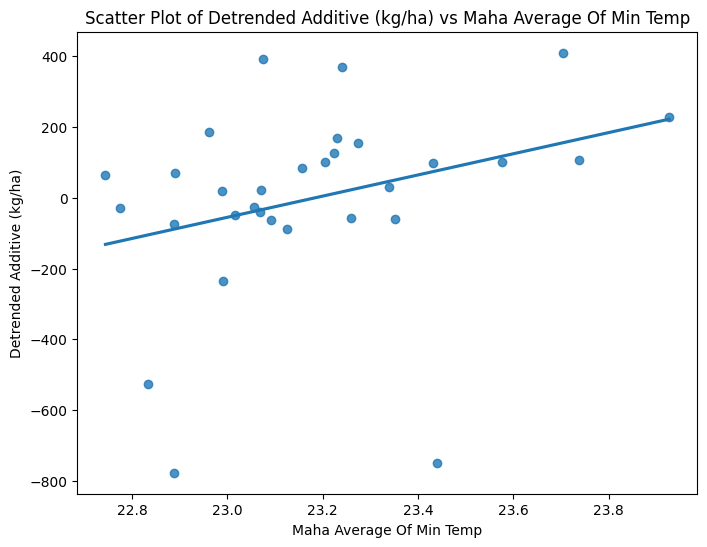

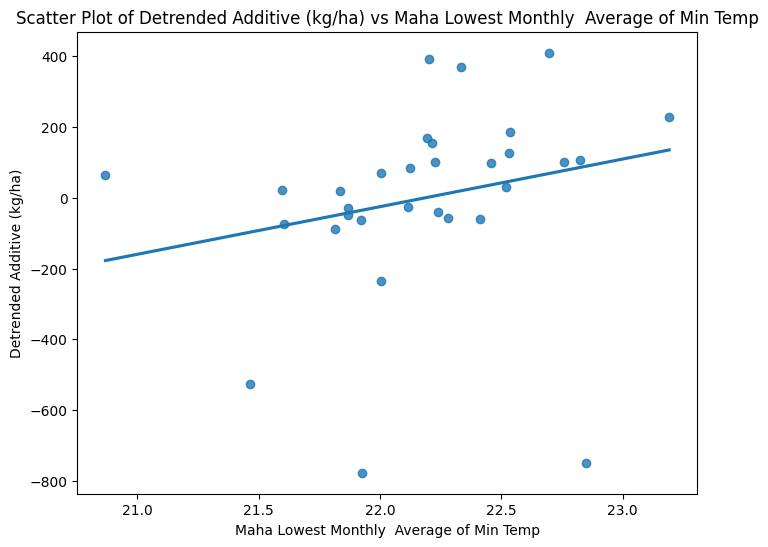

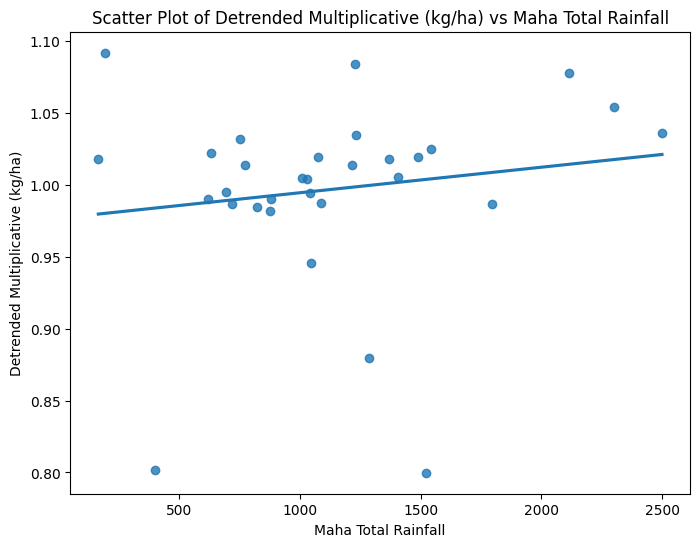

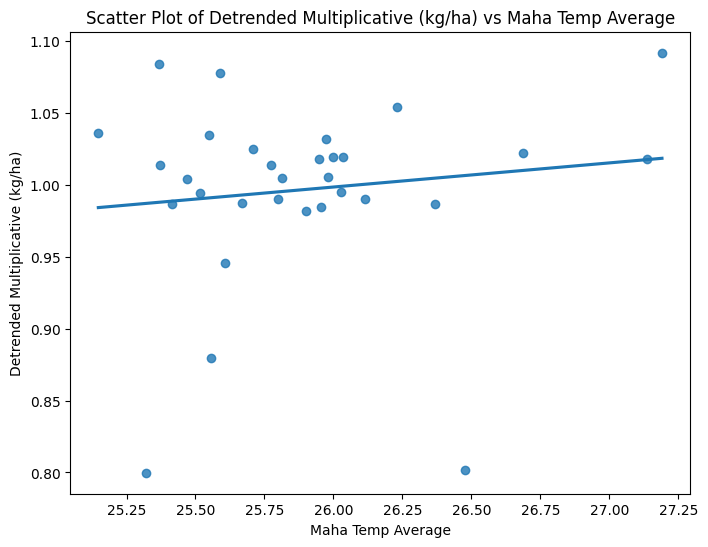

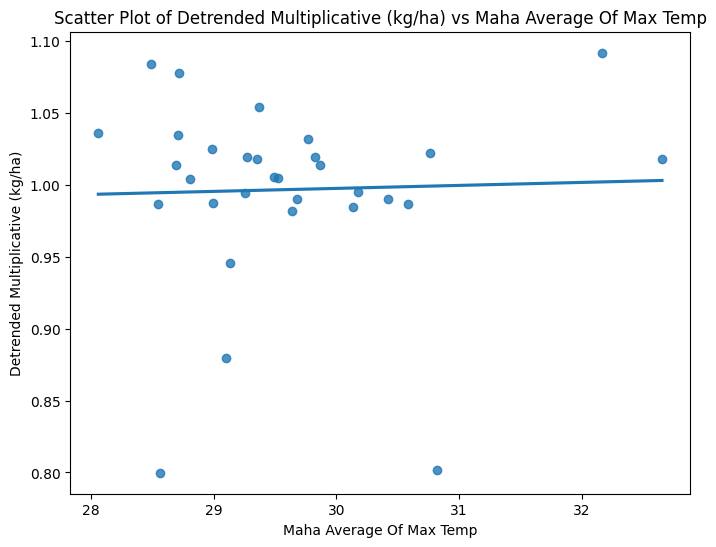

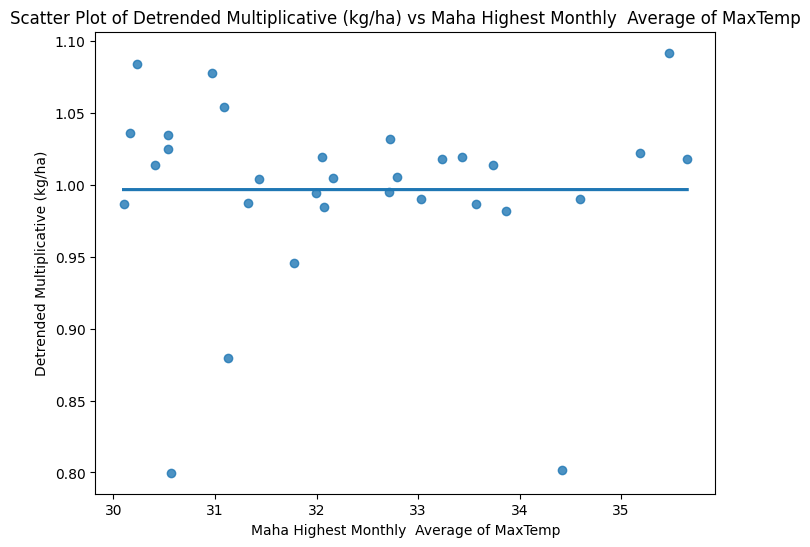

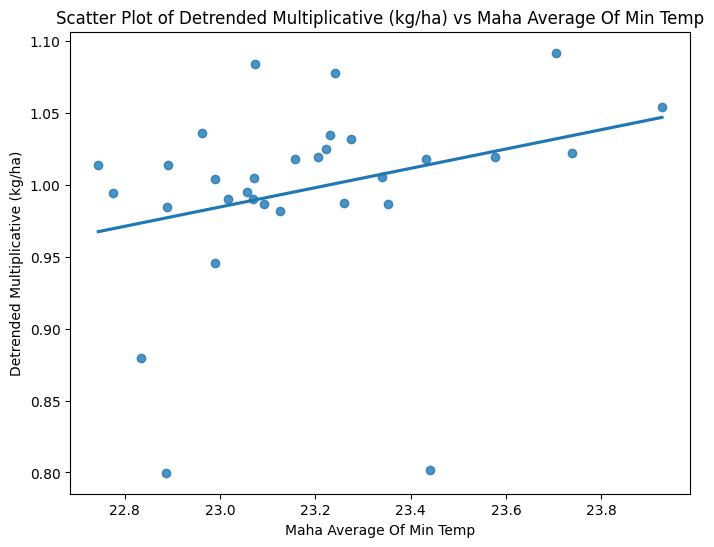

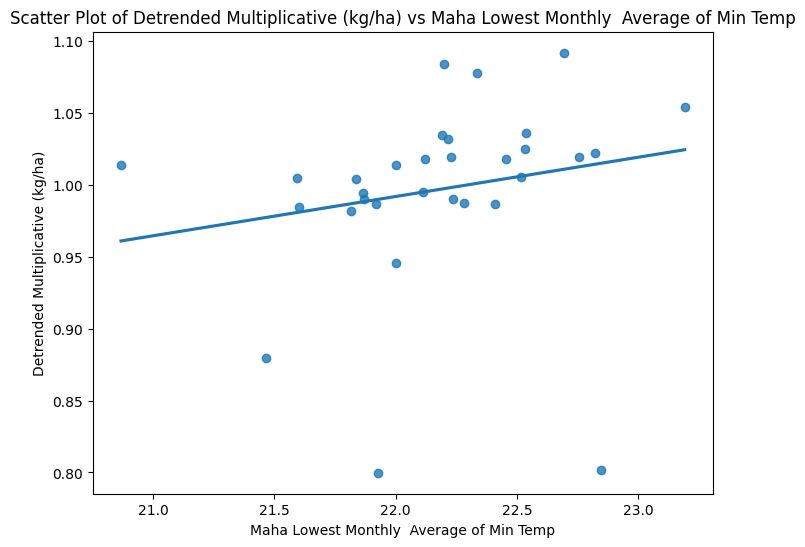

Correlation Matrix:
                                          Maha Total Rainfall  \
Maha Total Rainfall                                  1.000000   
Maha Temp Average                                   -0.628026   
Maha Average Of Max Temp                            -0.773414   
Maha Highest Monthly  Average of MaxTemp            -0.758628   
Maha Average Of Min Temp                             0.019096   
Maha Lowest Monthly  Average of Min Temp             0.201492   
Actual Yield (kg/ha)                                 0.195357   
Trend (kg/ha)                                        0.181361   
Detrended Additive (kg/ha)                           0.159874   
Detrended Multiplicative (kg/ha)                     0.148683   

                                          Maha Temp Average  \
Maha Total Rainfall                               -0.628026   
Maha Temp Average                                  1.000000   
Maha Average Of Max Temp                           0.950859   
Maha Highest

In [54]:
# Correlation analysis
weather_columns = ['Maha Total Rainfall', 'Maha Temp Average', 'Maha Average Of Max Temp', 'Maha Highest Monthly  Average of MaxTemp','Maha Average Of Min Temp','Maha Lowest Monthly  Average of Min Temp']
yield_columns = ['Actual Yield (kg/ha)',
                 'Trend (kg/ha)',
                 'Detrended Additive (kg/ha)',
                 'Detrended Multiplicative (kg/ha)']

for yield_col in yield_columns:
    for weather_col in weather_columns:
        # Scatter plot with regression line
        plt.figure(figsize=(8, 6))
        sns.regplot(x=data[weather_col], y=data[yield_col], ci=None)
        plt.title(f'Scatter Plot of {yield_col} vs {weather_col}')
        plt.xlabel(weather_col)
        plt.ylabel(yield_col)

        plt.show()

# Optional: Display correlation matrix
correlation_matrix = data[weather_columns + yield_columns].corr()
print("Correlation Matrix:")
print(correlation_matrix)

In [55]:
import pandas as pd
from scipy.stats import pearsonr

# Calculate Pearson's correlation
for var in weather_columns:
    # Replace 'AverageYieldKgPERha' with the correct column name from your dataset
    # Assuming the correct column name is 'Actual Yield (kg/ha)' based on your previous code

    # Drop rows with NaN or inf in the relevant columns before calculating correlation
    valid_data = data[[var, 'Actual Yield (kg/ha)']].dropna().replace([np.inf, -np.inf], np.nan).dropna()

    correlation_coefficient, p_value = pearsonr(valid_data['Actual Yield (kg/ha)'], valid_data[var])
    print(f"Variable: {var}")
    print(f"  Pearson Correlation Coefficient (r): {correlation_coefficient:.2f}")
    print(f"  P-value: {p_value:.4f}")
    alpha = 0.05
    if p_value < alpha:
        print(f"  The correlation is statistically significant (p < {alpha}).")
        if correlation_coefficient > 0:
            print("  Positive linear relationship.")
        else:
            print("  Negative linear relationship.")
    else:
        print(f"  The correlation is not statistically significant (p >= {alpha}).")
    print()

Variable: Maha Total Rainfall
  Pearson Correlation Coefficient (r): 0.20
  P-value: 0.2923
  The correlation is not statistically significant (p >= 0.05).

Variable: Maha Temp Average
  Pearson Correlation Coefficient (r): -0.04
  P-value: 0.8307
  The correlation is not statistically significant (p >= 0.05).

Variable: Maha Average Of Max Temp
  Pearson Correlation Coefficient (r): -0.10
  P-value: 0.6080
  The correlation is not statistically significant (p >= 0.05).

Variable: Maha Highest Monthly  Average of MaxTemp
  Pearson Correlation Coefficient (r): -0.05
  P-value: 0.7868
  The correlation is not statistically significant (p >= 0.05).

Variable: Maha Average Of Min Temp
  Pearson Correlation Coefficient (r): 0.09
  P-value: 0.6283
  The correlation is not statistically significant (p >= 0.05).

Variable: Maha Lowest Monthly  Average of Min Temp
  Pearson Correlation Coefficient (r): 0.06
  P-value: 0.7575
  The correlation is not statistically significant (p >= 0.05).



In [56]:
import pandas as pd
from scipy.stats import pearsonr

# Calculate Pearson's correlation
for var in weather_columns:
    # Drop rows with NaN or inf in the relevant columns before calculating correlation
    # Include 'Trend (kg/ha)' in the columns used to create valid_data
    valid_data = data[[var, 'Actual Yield (kg/ha)', 'Trend (kg/ha)']].dropna().replace([np.inf, -np.inf], np.nan).dropna()

    correlation_coefficient, p_value = pearsonr(valid_data['Trend (kg/ha)'], valid_data[var])
    print(f"Variable: {var}")
    print(f"  Pearson Correlation Coefficient (r): {correlation_coefficient:.2f}")
    print(f"  P-value: {p_value:.4f}")
    alpha = 0.05
    if p_value < alpha:
        print(f"  The correlation is statistically significant (p < {alpha}).")
        if correlation_coefficient > 0:
            print("  Positive linear relationship.")
        else:
            print("  Negative linear relationship.")
    else:
        print(f"  The correlation is not statistically significant (p >= {alpha}).")
    print()

Variable: Maha Total Rainfall
  Pearson Correlation Coefficient (r): 0.18
  P-value: 0.3289
  The correlation is not statistically significant (p >= 0.05).

Variable: Maha Temp Average
  Pearson Correlation Coefficient (r): -0.15
  P-value: 0.4150
  The correlation is not statistically significant (p >= 0.05).

Variable: Maha Average Of Max Temp
  Pearson Correlation Coefficient (r): -0.17
  P-value: 0.3738
  The correlation is not statistically significant (p >= 0.05).

Variable: Maha Highest Monthly  Average of MaxTemp
  Pearson Correlation Coefficient (r): -0.07
  P-value: 0.6950
  The correlation is not statistically significant (p >= 0.05).

Variable: Maha Average Of Min Temp
  Pearson Correlation Coefficient (r): -0.09
  P-value: 0.6394
  The correlation is not statistically significant (p >= 0.05).

Variable: Maha Lowest Monthly  Average of Min Temp
  Pearson Correlation Coefficient (r): -0.08
  P-value: 0.6770
  The correlation is not statistically significant (p >= 0.05).

